# Ensemble prediction of a precipitation extreme event

In [2]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr
import math
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (67.5 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     / 133.1 MB 110.9 MB/s
     |████████████████████████████████

In [3]:
year =  '2020'
day  =  '03'
month = '02'

hour_1  ='18'

url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_extracted_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)


### Find a specific point and plot the forecast. 


In [4]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identic*l location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
[ix,jx] = findindex(forecast_1.latitude,forecast_1.longitude,69.649,18.956) # Tromsø

#### For example wind speed forecasts

In [6]:
memb=1
accpp_point_forecast_1 = forecast_1.wind_speed[:,0,memb,ix,jx]

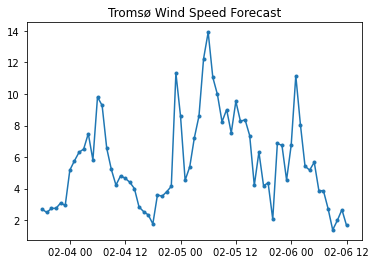

In [7]:
from matplotlib import pyplot as plt

plt.plot(forecast_1.time, accpp_point_forecast_1, '.-')

plt.title("Tromsø Wind Speed Forecast")
plt.show()

### Plot forecast on a map
Plotting for different ensamble members

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.p

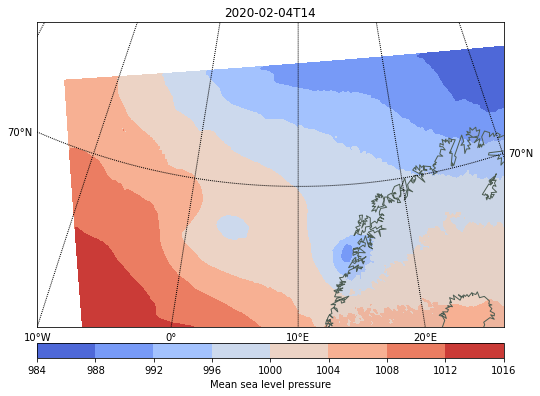

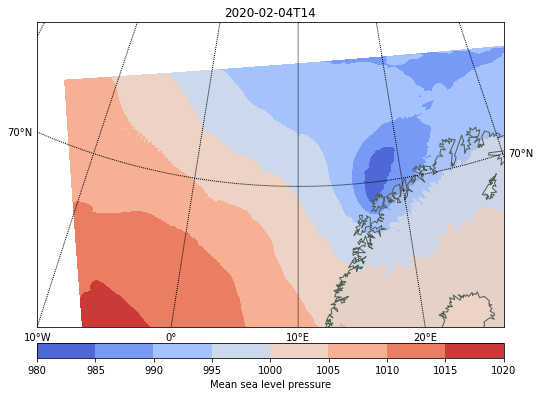

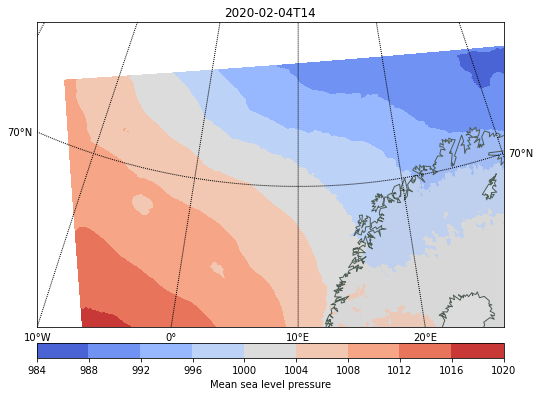

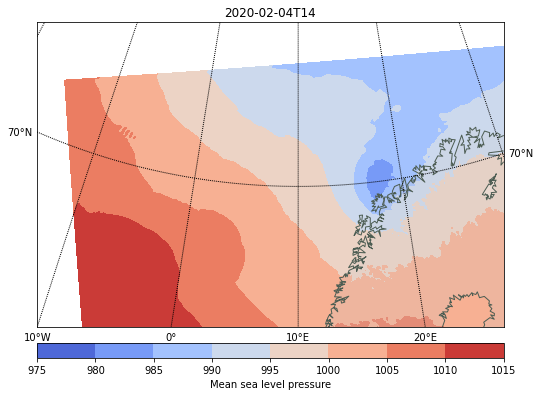

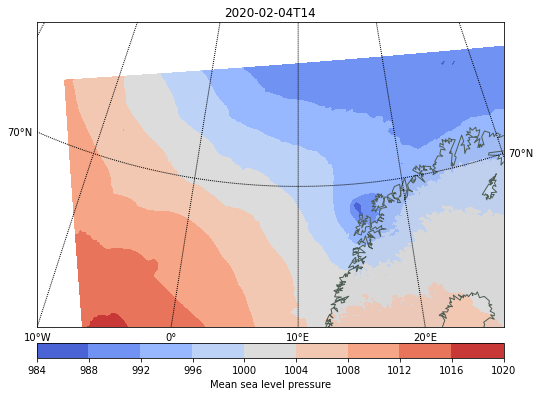

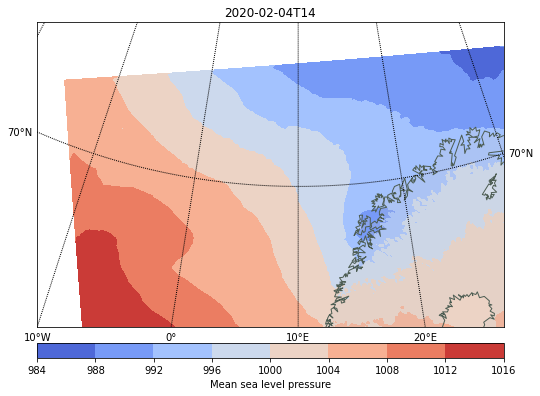

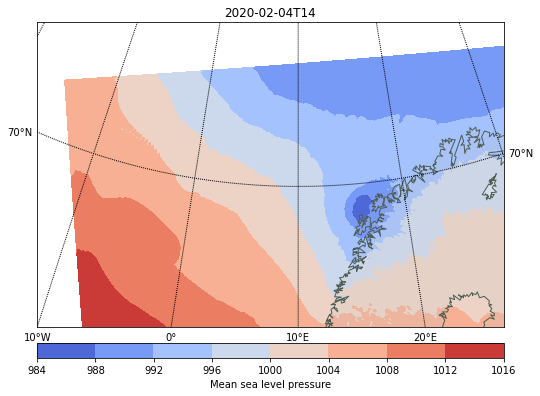

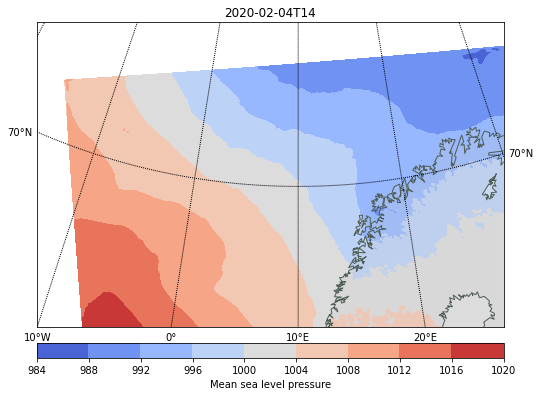

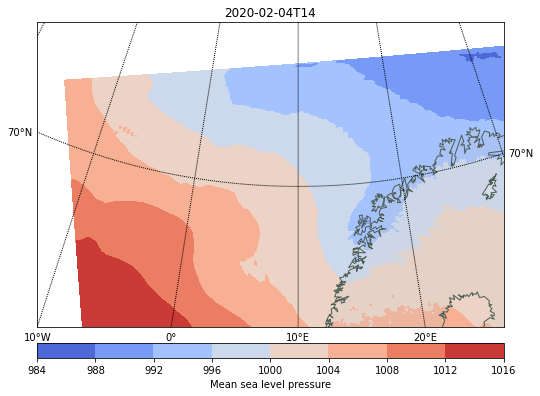

In [8]:
from mpl_toolkits.basemap import Basemap

timestep_1=20
mlevel=0
memb=1

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')  

#.....
memb=2

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')


#......

memb=3

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')


#......

memb=4

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')#......

memb=5

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')#......

memb=6

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')#......

memb=7

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')#......

memb=8

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')#......

memb=9

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 64.0, urcrnrlat=74.0, llcrnrlon=-10.0, urcrnrlon=35.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]/100),cmap=plt.cm.coolwarm,extemd='max')

plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Mean sea level pressure')#......


### Plot the wind speed forecasts at Tromsø for all ensemble members


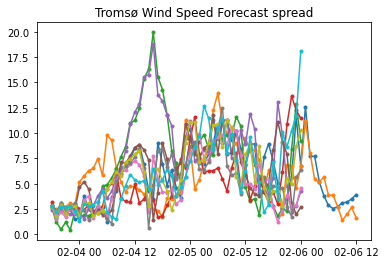

In [9]:

for i in range(10):
    memb=i
    accpp_point_forecast_1 = forecast_1.wind_speed[:,0,memb,ix,jx]
    plt.plot(forecast_1.time, accpp_point_forecast_1, '.-')


plt.title("Tromsø Wind Speed Forecast spread")
plt.show()

In [ ]:
# Calculating the spread


precip=forecast_1.precipitation_amount_acc[:,mlevel,:,:,:]

#Standard deviation
stdpp=precip.std('ensemble_member')


#Spread
spread= (stdpp**2)**(1/2)

